## Visual Analysis for Tourism Data

The data analysis workflow can be divided into five stages:
1. Discover (finding suitable datasets)
2. Wrangle (parsing and formatting the data)
3. Profile (exploratory data analysis)
4. Model (building a model)
5. Report (presenting the results)

### 1. Discover

We used the Kaggle database ([Kaggle](https://www.kaggle.com/)) to find a dataset representing the tourism counts in different countries, and another data source with additional information (e.g., population density, industry) of the countries.

### 2. Wrangle

Both datasets are available as CSV files, meaning they were already nicely structured as data matrices. There are, however, data quality issues that need to be solved. For example, instead of numeric information, some rows contain fuzzy information indicated by symbols like "\~" (e.g., export = "\~0.0"). Therefore, we decided to parse these rows and set the values to 0. Then, we joined the two datasets based on the country names in order to obtain one large data matrix composed of attributes from both datasets for most countries. Some country names could not be matched automatically, for example:
* "Bahamas" and "Bahamas, The"
* "Vietnam" and "Viet Nam"
* "Czech Republic" and "Czechia"
* ...

Some countries like North Macedonia or Kosovo were not found in the list of countries and were therefore excluded from the analysis.

In [5]:
import csv

# prepare a structure to store the data matrix
tourism_countries = []

# browse the dataset with the country parameters
with open('country-variables.csv', newline='') as csvfile:
    cdata = csv.reader(csvfile, delimiter=',', quotechar='"')
    idx = 0
    # for every row, store the information about the country
    for row in cdata:
        if idx > 0: # exclude the header
            # apply data formatting, if needed
            country = {
                'name': row[0],
                'region': row[1],
                'surface': 0 if row[2] == '~0' else int(row[2]),
                'population': int(row[3]),
                'population_density': float(row[4]),
                'gdp': float(row[8]),
                'ec_agriculture': 0 if row[9] == '~0.0' else float(row[9]),
                'ec_industry': float(row[10]),
                'ec_services': float(row[11]),
                'exports': 0 if row[19] == '~0' or row[19] == '...' else float(row[19]),
                'imports': 0 if row[20] == '~0' or row[20] == '...' else float(row[20]),
                'population_growth': 0 if row[23] == '~0.0' or row[23] == '-~0.0' else float(row[23]),
                'population_urban': float(row[24])
            }
            tourism_countries.append(country)
        idx += 1

print('Stored ' + str(len(tourism_countries)) + ' countries')

Stored 229 countries


In [6]:
# now join the information of the tourism counts with the country data
with open('tourism-data.csv', newline='') as csvfile:
    tdata = csv.reader(csvfile, delimiter=',', quotechar='"')
    idx = 0
    # for all countries where we have tourism information
    for row in tdata:
        if idx > 0: # exclude header
            cname = row[0]
            # apply data formatting, if necessary
            if cname == 'Bahamas, The':
                cname = 'Bahamas'
            if cname == 'Congo, Rep.':
                cname = 'Congo'
            if cname == 'Congo, Dem. Rep.':
                cname = 'Democratic Republic of the Congo'
            if cname == 'Micronesia, Fed. Sts.':
                cname = 'Micronesia'
            if cname == 'Gambia, The':
                cname = 'Gambia'
            if cname == 'Slovak Republic':
                cname = 'Slovakia'
            if cname == 'United States':
                cname = 'United States of America'
            if cname == 'Yemen, Rep.':
                cname = 'Yemen'
            found = False
            for c in tourism_countries:
                # store tourism counts for every year for the specific country
                if c.get('name') == cname:
                    # also apply data formatting, if necessary
                    c['1995'] = 0 if row[3] == '' else int(row[3].replace(',', ''))
                    c['1996'] = 0 if row[4] == '' else int(row[4].replace(',', ''))
                    c['1997'] = 0 if row[5] == '' else int(row[5].replace(',', ''))
                    c['1998'] = 0 if row[6] == '' else int(row[6].replace(',', ''))
                    c['1999'] = 0 if row[7] == '' else int(row[7].replace(',', ''))
                    c['2000'] = 0 if row[8] == '' else int(row[8].replace(',', ''))
                    c['2001'] = 0 if row[9] == '' else int(row[9].replace(',', ''))
                    c['2002'] = 0 if row[10] == '' else int(row[10].replace(',', ''))
                    c['2003'] = 0 if row[11] == '' else int(row[11].replace(',', ''))
                    c['2004'] = 0 if row[12] == '' else int(row[12].replace(',', ''))
                    c['2005'] = 0 if row[13] == '' else int(row[13].replace(',', ''))
                    c['2006'] = 0 if row[14] == '' else int(row[14].replace(',', ''))
                    c['2007'] = 0 if row[15] == '' else int(row[15].replace(',', ''))
                    c['2008'] = 0 if row[16] == '' else int(row[16].replace(',', ''))
                    c['2009'] = 0 if row[17] == '' else int(row[17].replace(',', ''))
                    c['2010'] = 0 if row[18] == '' else int(row[18].replace(',', ''))
                    c['2011'] = 0 if row[19] == '' else int(row[19].replace(',', ''))
                    c['2012'] = 0 if row[20] == '' else int(row[20].replace(',', ''))
                    c['2013'] = 0 if row[21] == '' else int(row[21].replace(',', ''))
                    c['2014'] = 0 if row[22] == '' else int(row[22].replace(',', ''))
                    c['2015'] = 0 if row[23] == '' else int(row[23].replace(',', ''))
                    c['2016'] = 0 if row[24] == '' else int(row[24].replace(',', ''))
                    c['2017'] = 0 if row[25] == '' else int(row[25].replace(',', ''))
                    found = True
        idx += 1
        
print('Added tourism counts')

Added tourism counts


### 3. Profile

We now wanted to explore the data in more detail, to see whether we can detect any interesting patterns. For this, we started plotting the data in different ways. 

#### Changes over time

First of all, we plotted all countries and their tourism counts over the years. We used Matplotlib for this purpose.

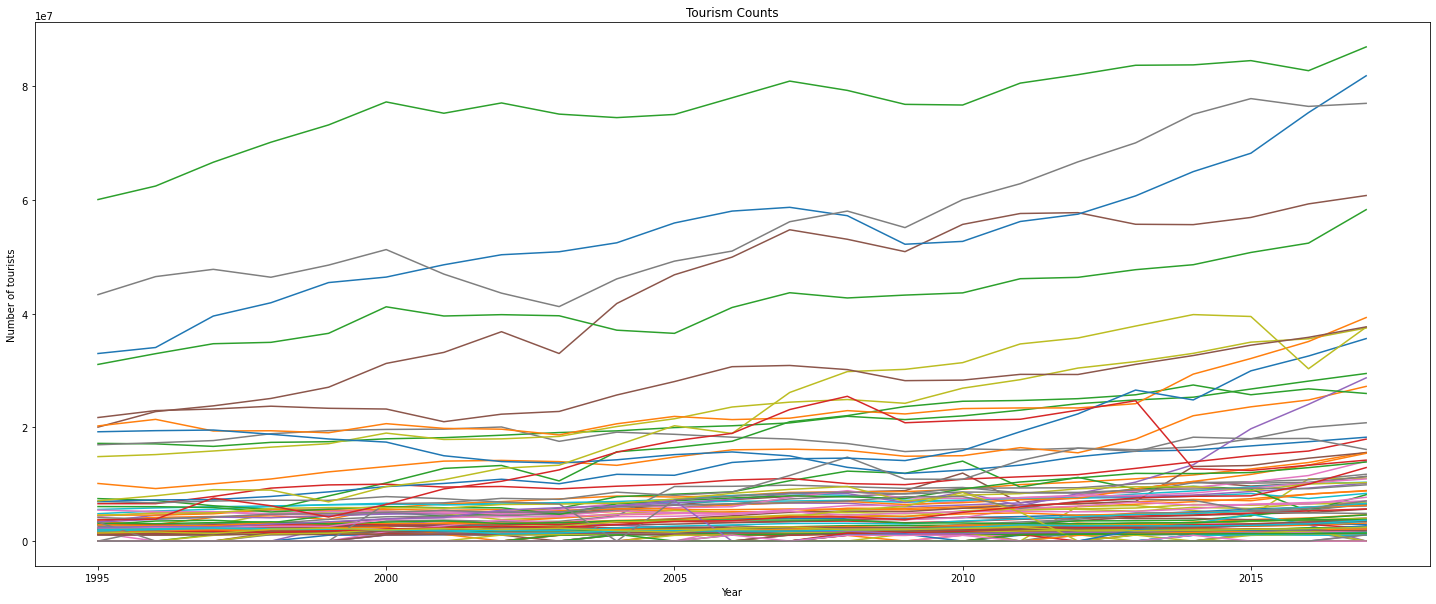

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 10] # sets the plot size

# data needs to be arranged along a timeline to be plotted accordingly
plot_years = [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
plot_countries = []
plot_names = []
# align values over years for all countries
for c in tourism_countries:
    country_values = []
    country_values.append(c.get('1995'))
    country_values.append(c.get('1996'))
    country_values.append(c.get('1997'))
    country_values.append(c.get('1998'))
    country_values.append(c.get('1999'))
    country_values.append(c.get('2000'))
    country_values.append(c.get('2001'))
    country_values.append(c.get('2002'))
    country_values.append(c.get('2003'))
    country_values.append(c.get('2004'))
    country_values.append(c.get('2005'))
    country_values.append(c.get('2006'))
    country_values.append(c.get('2007'))
    country_values.append(c.get('2008'))
    country_values.append(c.get('2009'))
    country_values.append(c.get('2010'))
    country_values.append(c.get('2011'))
    country_values.append(c.get('2012'))
    country_values.append(c.get('2013'))
    country_values.append(c.get('2014'))
    country_values.append(c.get('2015'))
    country_values.append(c.get('2016'))
    country_values.append(c.get('2017'))
    plot_countries.append(country_values)
    plot_names.append(c.get('name'))

# create a Matplotlib line plot
for i, n in enumerate(plot_names):
    plt.plot(plot_years, plot_countries[i], label = n)

# define plot labels
plt.title('Tourism Counts')
plt.xlabel('Year')
plt.ylabel('Number of tourists')

# show plot
plt.show()

#### Correlations

We also tested to see if there was any correlation between country values and tourism counts over the years. For this, we created a correlation matrix for all attributes in the data in which the number of tourists was summed up to one value. We used Seaborn to plot the correlation heatmap.

<AxesSubplot:>

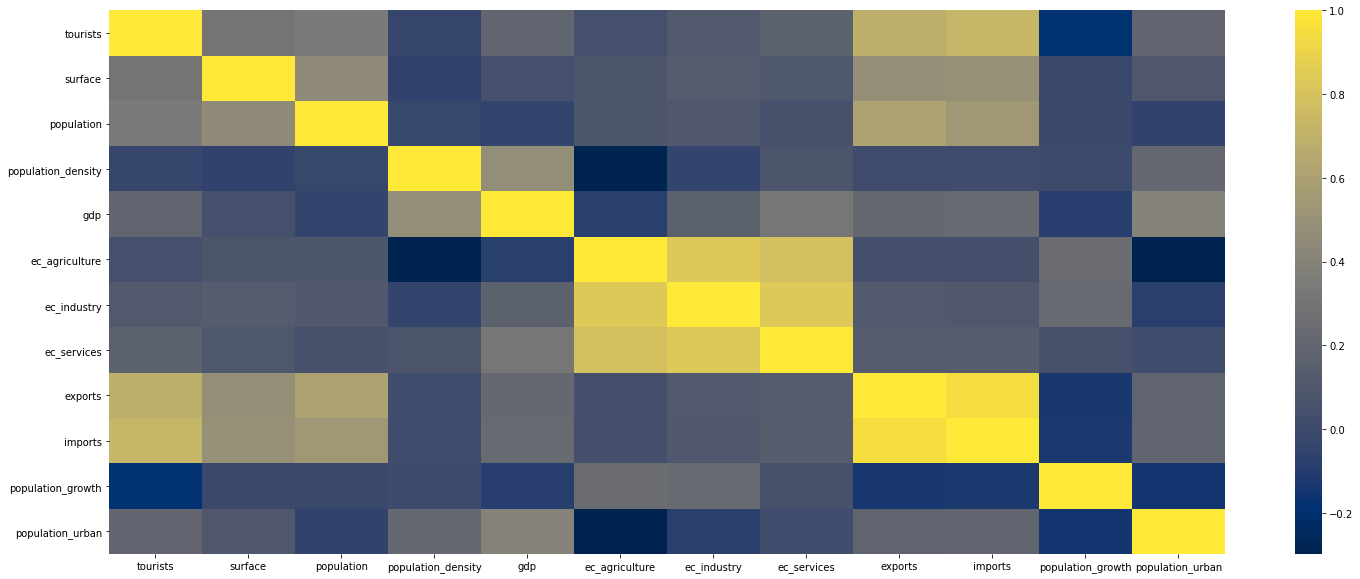

In [11]:
import seaborn as sns
import numpy as np

data = []
part = []
# sum up all tourism counts
for c in tourism_countries:
    tourists = 0
    tourists += 0 if c.get('1995') is None else c.get('1995')
    tourists += 0 if c.get('1996') is None else c.get('1996')
    tourists += 0 if c.get('1997') is None else c.get('1997')
    tourists += 0 if c.get('1998') is None else c.get('1998')
    tourists += 0 if c.get('1999') is None else c.get('1999')
    tourists += 0 if c.get('2000') is None else c.get('2000')
    tourists += 0 if c.get('2001') is None else c.get('2001')
    tourists += 0 if c.get('2002') is None else c.get('2002')
    tourists += 0 if c.get('2003') is None else c.get('2003')
    tourists += 0 if c.get('2004') is None else c.get('2004')
    tourists += 0 if c.get('2005') is None else c.get('2005')
    tourists += 0 if c.get('2006') is None else c.get('2006')
    tourists += 0 if c.get('2007') is None else c.get('2007')
    tourists += 0 if c.get('2008') is None else c.get('2008')
    tourists += 0 if c.get('2009') is None else c.get('2009')
    tourists += 0 if c.get('2010') is None else c.get('2010')
    tourists += 0 if c.get('2011') is None else c.get('2011')
    tourists += 0 if c.get('2012') is None else c.get('2012')
    tourists += 0 if c.get('2013') is None else c.get('2013')
    tourists += 0 if c.get('2014') is None else c.get('2014')
    tourists += 0 if c.get('2015') is None else c.get('2015')
    tourists += 0 if c.get('2016') is None else c.get('2016')
    tourists += 0 if c.get('2017') is None else c.get('2017')
    part.append(tourists)
data.append(part)

# align data according to country parameters

part = []
for c in tourism_countries:
    part.append(c.get('surface'))
data.append(part)

part = []
for c in tourism_countries:
    part.append(c.get('population'))
data.append(part)

part = []
for c in tourism_countries:
    part.append(c.get('population_density'))
data.append(part)

part = []
for c in tourism_countries:
    part.append(c.get('gdp'))
data.append(part)

part = []
for c in tourism_countries:
    part.append(c.get('ec_agriculture'))
data.append(part)

part = []
for c in tourism_countries:
    part.append(c.get('ec_industry'))
data.append(part)

part = []
for c in tourism_countries:
    part.append(c.get('ec_services'))
data.append(part)

part = []
for c in tourism_countries:
    part.append(c.get('exports'))
data.append(part)

part = []
for c in tourism_countries:
    part.append(c.get('imports'))
data.append(part)

part = []
for c in tourism_countries:
    part.append(c.get('population_growth'))
data.append(part)

part = []
for c in tourism_countries:
    part.append(c.get('population_urban'))
data.append(part)

# calculate all correlations
corr = np.corrcoef(data)

# prepare the plot labels
labels = ['tourists', 'surface', 'population', 'population_density', 'gdp', 'ec_agriculture', 'ec_industry', 'ec_services', 'exports', 'imports', 'population_growth', 'population_urban']

# plot the correlation heatmap
sns.heatmap(corr,
           xticklabels = labels,
           yticklabels = labels,
           cmap = 'cividis')


### 4. Model

By taking the parameters of surface area, number of people working in the service sector, and exports, we tried to predict the number of tourists using a linear regression model.

Coefficients: 
 [[609.08532756]]
Mean squared error: 27467446462036436.00
Coefficient of determination: 0.47


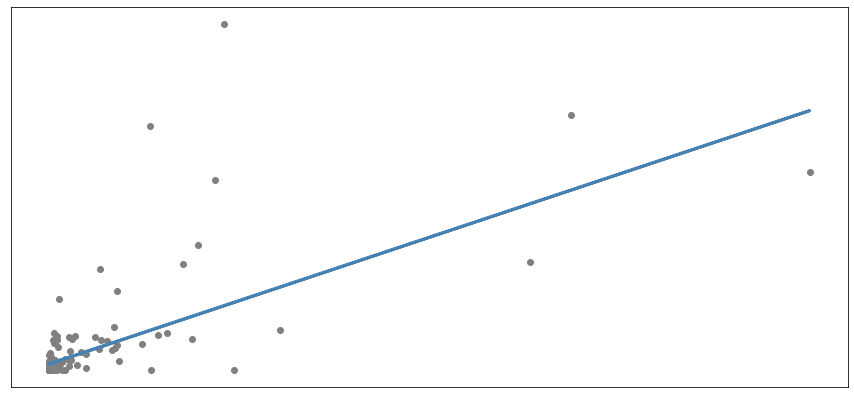

In [16]:
import numpy as np
import random
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7] # sets the plot size

tourism = []
# prepare the data for modelling
for c in tourism_countries:
    tourists = 0
    tourists += 0 if c.get('1995') is None else c.get('1995')
    tourists += 0 if c.get('1996') is None else c.get('1996')
    tourists += 0 if c.get('1997') is None else c.get('1997')
    tourists += 0 if c.get('1998') is None else c.get('1998')
    tourists += 0 if c.get('1999') is None else c.get('1999')
    tourists += 0 if c.get('2000') is None else c.get('2000')
    tourists += 0 if c.get('2001') is None else c.get('2001')
    tourists += 0 if c.get('2002') is None else c.get('2002')
    tourists += 0 if c.get('2003') is None else c.get('2003')
    tourists += 0 if c.get('2004') is None else c.get('2004')
    tourists += 0 if c.get('2005') is None else c.get('2005')
    tourists += 0 if c.get('2006') is None else c.get('2006')
    tourists += 0 if c.get('2007') is None else c.get('2007')
    tourists += 0 if c.get('2008') is None else c.get('2008')
    tourists += 0 if c.get('2009') is None else c.get('2009')
    tourists += 0 if c.get('2010') is None else c.get('2010')
    tourists += 0 if c.get('2011') is None else c.get('2011')
    tourists += 0 if c.get('2012') is None else c.get('2012')
    tourists += 0 if c.get('2013') is None else c.get('2013')
    tourists += 0 if c.get('2014') is None else c.get('2014')
    tourists += 0 if c.get('2015') is None else c.get('2015')
    tourists += 0 if c.get('2016') is None else c.get('2016')
    tourists += 0 if c.get('2017') is None else c.get('2017')
    tourism.append(tourists)

# set the parameter for the linear regression
parameter = []
for c in tourism_countries:
    # to test parameter 'surface area':
    parameter.append(c.get('surface'))
    # to test parameter 'people in service sector':
    #parameter.append(c.get('ec_services'))
    # to test parameter 'exports':
    #parameter.append(c.get('exports'))

# define the training sample
regr = linear_model.LinearRegression()
trainsize = 50
indeces = random.sample(range(0, len(parameter)), trainsize)

# train the model
train_x = np.ones((trainsize, 1))
train_y = np.ones((trainsize, 1))
idx = 0
for i in indeces:
    train_x[idx][0] = parameter[i]
    train_y[idx][0] = tourism[i]
    idx += 1
regr.fit(train_x, train_y)

# test the model
testsize = len(tourism) - trainsize
test_x = np.ones((testsize, 1))
test_y = np.ones((testsize, 1))
idx = 0
for i, n in enumerate(tourism):
    if i not in indeces:
        test_x[idx][0] = parameter[i]
        test_y[idx][0] = tourism[i]
        idx += 1

# calculate the model differences
pred_y = regr.predict(test_x)
print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f' % mean_squared_error(test_y, pred_y))
print('Coefficient of determination: %.2f' % r2_score(test_y, pred_y))

# plotting
plt.scatter(test_x, test_y,  color='grey')
plt.plot(test_x, pred_y, color='steelblue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()


A better regression model can be created when combining these three parameters to form a multivariate regression model. In this case, the problem is that the results are much more difficult to visualize than when only one parameter is used:

In [17]:
import numpy as np
import random
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7] # sets the plot size

tourism = []
# prepare the data for modelling
for c in tourism_countries:
    tourists = 0
    tourists += 0 if c.get('1995') is None else c.get('1995')
    tourists += 0 if c.get('1996') is None else c.get('1996')
    tourists += 0 if c.get('1997') is None else c.get('1997')
    tourists += 0 if c.get('1998') is None else c.get('1998')
    tourists += 0 if c.get('1999') is None else c.get('1999')
    tourists += 0 if c.get('2000') is None else c.get('2000')
    tourists += 0 if c.get('2001') is None else c.get('2001')
    tourists += 0 if c.get('2002') is None else c.get('2002')
    tourists += 0 if c.get('2003') is None else c.get('2003')
    tourists += 0 if c.get('2004') is None else c.get('2004')
    tourists += 0 if c.get('2005') is None else c.get('2005')
    tourists += 0 if c.get('2006') is None else c.get('2006')
    tourists += 0 if c.get('2007') is None else c.get('2007')
    tourists += 0 if c.get('2008') is None else c.get('2008')
    tourists += 0 if c.get('2009') is None else c.get('2009')
    tourists += 0 if c.get('2010') is None else c.get('2010')
    tourists += 0 if c.get('2011') is None else c.get('2011')
    tourists += 0 if c.get('2012') is None else c.get('2012')
    tourists += 0 if c.get('2013') is None else c.get('2013')
    tourists += 0 if c.get('2014') is None else c.get('2014')
    tourists += 0 if c.get('2015') is None else c.get('2015')
    tourists += 0 if c.get('2016') is None else c.get('2016')
    tourists += 0 if c.get('2017') is None else c.get('2017')
    tourism.append(tourists)

# prepare the parameters
    
parameter1 = []
for c in tourism_countries:
    parameter1.append(c.get('surface'))

parameter2 = []
for c in tourism_countries:
    parameter2.append(c.get('exports'))
    
parameter3 = []
for c in tourism_countries:
    parameter3.append(c.get('ec_services'))

# define the training data
regr = linear_model.LinearRegression()
trainsize = 50
indeces = random.sample(range(0, len(parameter)), trainsize)

# train the model
train_x = np.ones((trainsize, 3))
train_y = np.ones((trainsize, 1))
idx = 0
for i in indeces:
    train_x[idx][0] = parameter1[i]
    train_x[idx][1] = parameter2[i]
    train_x[idx][2] = parameter3[i]
    train_y[idx][0] = tourism[i]
    idx += 1
regr.fit(train_x, train_y)

# test the model
testsize = len(tourism) - trainsize
test_x = np.ones((testsize, 3))
test_y = np.ones((testsize, 1))
idx = 0
for i, n in enumerate(tourism):
    if i not in indeces:
        test_x[idx][0] = parameter1[i]
        test_x[idx][1] = parameter2[i]
        test_x[idx][2] = parameter3[i]
        test_y[idx][0] = tourism[i]
        idx += 1

pred_y = regr.predict(test_x)

# print the outcomes
print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f' % mean_squared_error(test_y, pred_y))
print('Coefficient of determination: %.2f' % r2_score(test_y, pred_y))

Coefficients: 
 [[-1.86753493e+01  1.34863235e+03  6.42860695e+04]]
Mean squared error: 41111167060470584.00
Coefficient of determination: -0.21


### 5. Report

Within the last years, data analysts have increasingly turned towards creating interactive dashboards, where users can explore the data themselves. To provide an example, we also created a dashboard in Tableau for the tourism data:

![Dashboard](report-dashboard.png)